# 12_Matplotlib and Seaborn

**[1] Matplotlib**<br>
- Single plot <br>
- Multiple plots <br>
- Secondary axis<br>

**[2] Seaborn**<br>
- X-axis with categorical data: <code>countplot</code>, <code>barplot</code>, <code>heatmap</code><br>
- Numbercial data: <code>histogram</code>, <code>scatterplot</code><br>
- Multiple plot: <code>jointplot</code>, <code>pairplot</code>, <code>FacetGrid</code><br>

In [1]:
import pandas as pd

## [1] matplotlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
sales_df = pd.DataFrame({"Sales":[113, 84, 87, 50, 97, 68, 48, 54, 37, 38, 40, 57],
                         "Cumulative_sales":[113, 197, 284, 334, 431, 499, 547, 601, 638, 676, 716, 773]}, 
                        index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
sales_df 

,Sales,Cumulative_sales
Jan,113,113
Feb,84,197
Mar,87,284
Apr,50,334
May,97,431
Jun,68,499
Jul,48,547
Aug,54,601
Sep,37,638
Oct,38,676


- **Single plot**

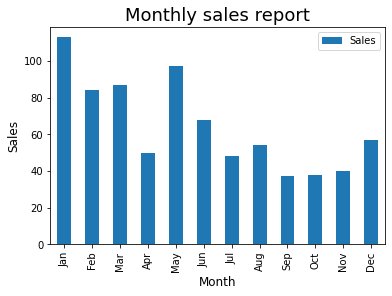

In [4]:
#step1: Create a figure and axes
fig, ax = plt.subplots()

#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales", ax = ax)

#step3: Format the style
ax.set_title("Monthly sales report", fontsize=18)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Sales", fontsize=12);

- **Multiple subplots**

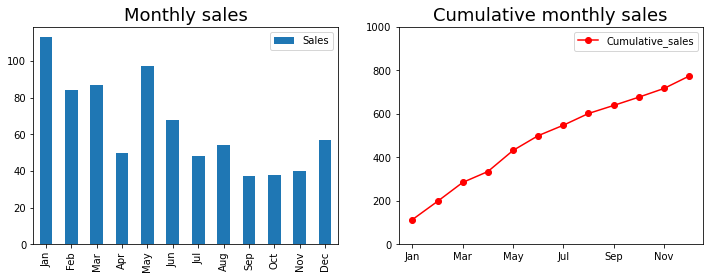

In [5]:
#step1: Create a figure and axes
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales", ax=ax[0])
sales_df.plot(kind = "line", y = "Cumulative_sales", ax=ax[1], color = "red", marker = "o")
#step3: Format the style
ax[0].set_title("Monthly sales", fontsize = 18)
ax[1].set_title("Cumulative monthly sales", fontsize = 18)
ax[1].set_ylim([0,1000]);

- **Secondary y-axis**

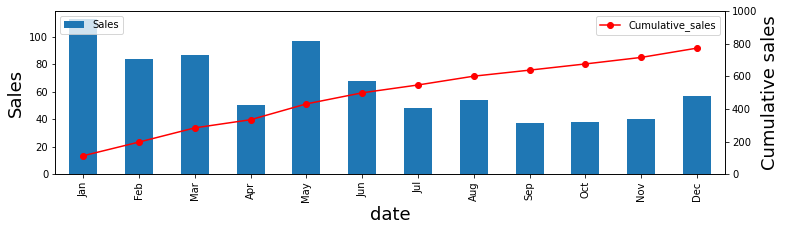

In [6]:
#step1: Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12,3))
ax2 = ax1.twinx()
#step2: Plot a chart in axes
sales_df.plot(kind = "bar", y = "Sales", ax=ax1)
sales_df.plot(kind = "line", y = "Cumulative_sales", ax=ax2, color = "red", marker = "o")
#step3: Format the style
ax1.set_xlabel("date", fontsize = 18)
ax1.set_ylabel("Sales", fontsize = 18)
ax1.legend(loc="upper left")
ax2.set_ylabel("Cumulative sales", fontsize = 18)
ax2.set_ylim([0,1000])
ax2.legend(loc="upper right");

## Exercise.A

In [7]:
import random
random.seed(0)
product_df = pd.DataFrame({"A":[random.randint(100,150) for i in range(6)],"B":[random.randint(20,150) for i in range(6)],
                           "C":[random.randint(120,150) for i in range(6)]}, index = ["Jan","Feb","Mar","Apr","May","Jun"])
product_df

,A,B,C
Jan,124,144,136
Feb,148,123,124
Mar,126,97,129
Apr,102,142,124
May,116,111,144
Jun,132,75,123


**(A.1) Given the synthetic dataset above, each column represents the quarterly sales of products A, B, and C. Create a figure with three bar charts to show the sales data of each product.**<br>
Setting: <code>figsize = (15,4)</code>

## [2] Seaborn

In [8]:
# pip install seaborn
# conda install seaborn

In [9]:
import seaborn as sns

In [10]:
wine_raw_df = pd.read_csv("../dataset/wine.csv", index_col = [0])
wine_df = wine_raw_df[(wine_raw_df.country.isin(["Italy","France","Spain"])&
                       (wine_raw_df.price < 200)&
                       (wine_raw_df.variety.isin(["Red Blend","Tempranillo","Chardonnay", "Pinot Noir", "Cabernet Sauvignon"])))].loc[:,["country","price","variety"]]
wine_df

,country,price,variety
17,Spain,80.0,Tempranillo
39,Italy,29.0,Red Blend
43,Italy,39.0,Red Blend
45,Italy,30.0,Red Blend
51,France,68.0,Chardonnay
...,...,...,...
150908,France,65.0,Pinot Noir
150909,France,52.0,Pinot Noir
150910,France,38.0,Pinot Noir
150911,France,37.0,Pinot Noir


### [2.1] X-axis with categorical data

- **Countplot**

<AxesSubplot:xlabel='country', ylabel='count'>

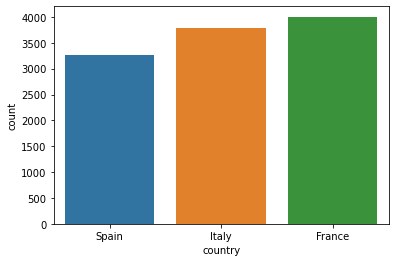

In [11]:
sns.countplot(data = wine_df, x = "country")

- **Countplot - colorize subgroups**

<AxesSubplot:xlabel='country', ylabel='count'>

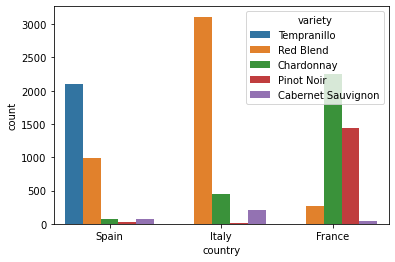

In [12]:
sns.countplot(data = wine_df, x = "country", hue = "variety")

- **Bar plot**

<AxesSubplot:xlabel='variety', ylabel='price'>

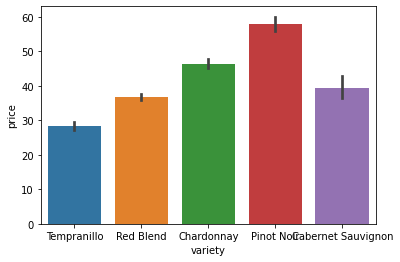

In [13]:
sns.barplot(data = wine_df, x = "variety", y = "price")

- **Heatmap**

In [14]:
# data preparation
heatmap_data = pd.crosstab(wine_df["variety"],wine_df["country"])
heatmap_data

country,France,Italy,Spain
variety,,,
Cabernet Sauvignon,44,214,74
Chardonnay,2247,450,67
Pinot Noir,1446,7,31
Red Blend,267,3111,987
Tempranillo,0,1,2099


<AxesSubplot:xlabel='country', ylabel='variety'>

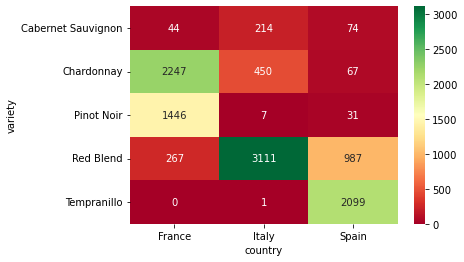

In [15]:
sns.heatmap(data = heatmap_data, annot = True, fmt = "d", cmap = "RdYlGn")

## Exercise.B

The sinking of the Titanic is one of the most infamous shipwrecks in history, resulting in the death of 1502 out of 2224 passengers and crew. 
- **survived**: 0 = No, 1 = Yes
- **pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: sex
- **age**: Age
- **sibsp**: number of siblings / spouses aboard the Titanic
- **parch**: number of parents / children aboard the Titanic  
- **fare**: Passenger fare
- **embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)    

In [16]:
titanic_df = sns.load_dataset("titanic", dtype = {"survived": object, "pclass":object})

**(B.1) Show the first 10 rows of the dataset.**

**(B.2) Use a count plot to display the number of male and female passengers.**

**(B.3) Use a count plot to display the number of male and female passengers, and use the column <code>survived</code> to divide the data into two subgroups.**<br>
Hint: <code>hue</code>

**(B.4) Count the number of surviving and non-surviving passengers in each class.**<br>
Hint: Create a cross table based on the columns <code>pclass</code> and <code>survived</code> using <code>crosstab()</code>.

**(B.5) Use the result obtained in (B.4) to draw a heatmap.**<br>
Setting: <code>cmap = "coolwarm"</code>

### [2.2] Numerical data

In [17]:
# Import data and select observations with pressure greater than 0 (remove outliers)
diabetes_df = pd.read_csv("../dataset/diabetes.csv", dtype = {"Outcome":object})
diabetes_df = diabetes_df[diabetes_df.BloodPressure>0]

- **Histogram**

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

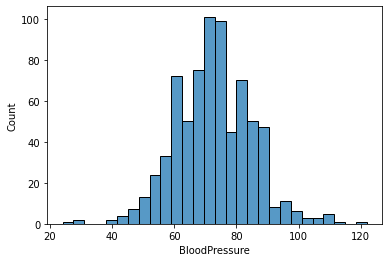

In [18]:
sns.histplot(data = diabetes_df, x = "BloodPressure")

- **Histogram - group by a categorical variable**

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

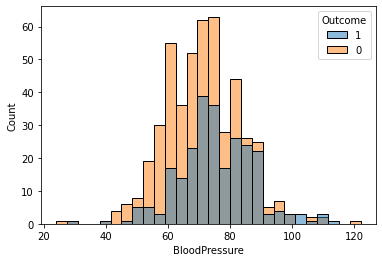

In [19]:
sns.histplot(data = diabetes_df, x = "BloodPressure", hue = "Outcome")

- **Scatter plot**

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

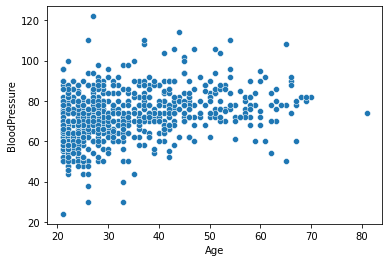

In [20]:
sns.scatterplot(data = diabetes_df, x = "Age", y = "BloodPressure")

- **Scatter plot - group by a categorical variable**

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

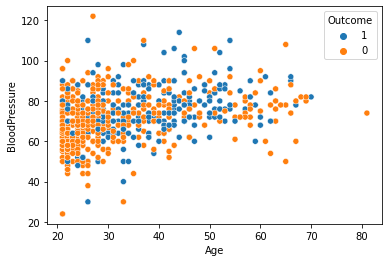

In [21]:
sns.scatterplot(data = diabetes_df, x = "Age", y = "BloodPressure", hue = "Outcome")

### [2.3] Multiple plots 

- **Joint plot**

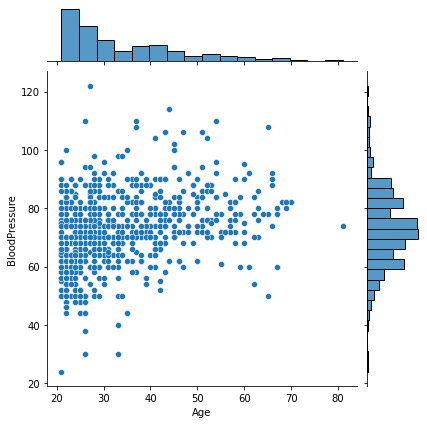

In [22]:
sns.jointplot(data = diabetes_df, x = "Age", y = "BloodPressure")

- **Joint plot - group by a categorical variable**

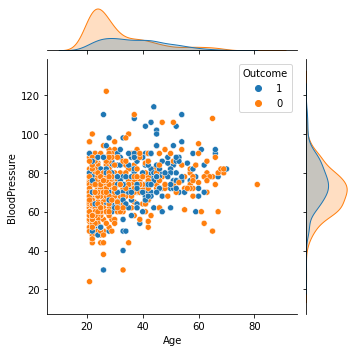

In [23]:
sns.jointplot(data = diabetes_df, x = "Age", y = "BloodPressure", hue = "Outcome", height = 5)

- **Pairplot**

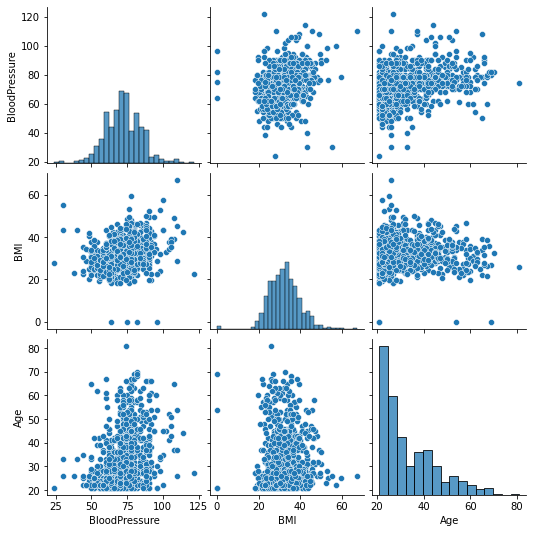

In [24]:
sns.pairplot(data = diabetes_df.loc[:,["BloodPressure","BMI", "Age"]])

- **Pair plot - group by a categorical variable**

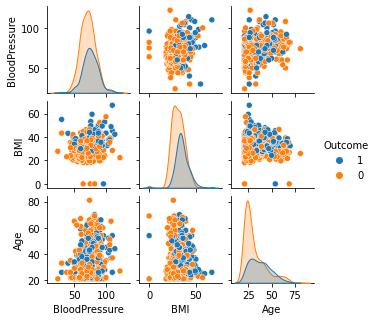

In [25]:
sns.pairplot(data = diabetes_df.loc[:,["BloodPressure","BMI", "Age", "Outcome"]], 
             hue = "Outcome", 
             height = 1.5)

## Exercise.C

- **price**: Price (USD)
- **carat**: Weight of the diamond 
- **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: Diamond colour, from J (worst) to D (best)
- **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: Length (mm)
- **y**: Width (mm) 
- **z**: Depth (mm) 
- **depth**: Total depth percentage

In [26]:
diamond_df = sns.load_dataset("diamonds")

**(C.1) Show the first 5 rows of the dataset.**

**(C.2) Show the distribution of the price.**<br>
Hint: <code>histplot()</code>

**(C.3) Use a scatter plot to show the relathionship between <code>carat</code> and <code>price</code> of the best clarity diamonds.**<br>
Hint: Select a subset by using <code>diamond_df.clarity == "IF"</code>

**(C.4) Use a join plot to show the relathionship between <code>carat</code> and <code>price</code> of the best clarity diamonds and their individual distributions.**

- **FacetGrid**

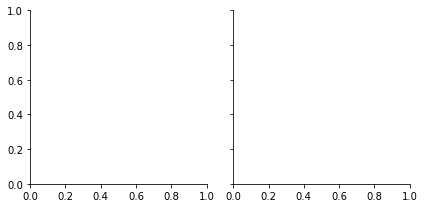

In [27]:
# Initialize the grid
g =  sns.FacetGrid(data = diabetes_df, col = "Outcome")

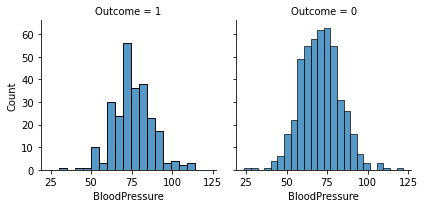

In [28]:
# Draw a plot on every facet
g = sns.FacetGrid(data =diabetes_df, col="Outcome")
g.map(sns.histplot, "BloodPressure")

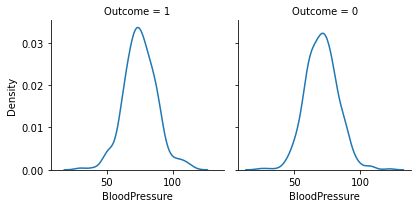

In [29]:
g = sns.FacetGrid(data = diabetes_df, col="Outcome")
g.map(sns.kdeplot, "BloodPressure")

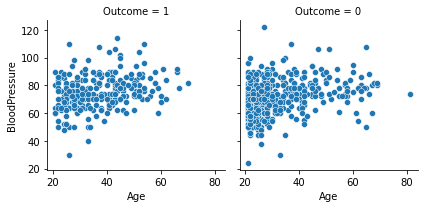

In [30]:
g = sns.FacetGrid(data = diabetes_df, col = "Outcome")
g.map(sns.scatterplot,"Age", "BloodPressure")

## Exercise.D

**(D.1) Use the dataframe <code>diamond_df</code> in (C.1). Draw a price histogram for each <code>cut</code> category.**<br>
Hint: <code>col="cut"</code>